In [2]:
import glob
import os

import matplotlib.pyplot as plt 
import xarray as xr 
import numpy as np
import seaborn as sns

# Generated files ? of 13041 ..

In [16]:
glob.glob('/home/hanna/EX3_Results_AR/*')

['/home/hanna/EX3_Results_AR/AR-5',
 '/home/hanna/EX3_Results_AR/AR-B-5',
 '/home/hanna/EX3_Results_AR/AR-0',
 '/home/hanna/EX3_Results_AR/AR-T-5',
 '/home/hanna/EX3_Results_AR/AR-S-5',
 '/home/hanna/EX3_Results_AR/AR-B-S-5',
 '/home/hanna/EX3_Results_AR/AR-T-S-5']

In [18]:
configs = [ fil.split('/')[-1] for fil in glob.glob('/home/hanna/EX3_Results_AR/*')]

In [19]:
configs

['AR-5', 'AR-B-5', 'AR-T-5', 'AR-S-5', 'AR-B-S-5', 'AR-T-S-5']

In [22]:
for conf in configs:
    print(len(glob.glob('/home/hanna/EX3_Results_AR/{}/*performance*'.format(conf))))

585
585
585
585
585
585


In [23]:
585/9

65.0

# Why does AR models crash??

In [13]:
uniQ = [fil.split('performance') for fil in files]

In [14]:
uniQ

[['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-15.0_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-14.75_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-14.5_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-14.25_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-14.0_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-13.75_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-13.5_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-13.25_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-13.0_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-12.75_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-12.5_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-12.25_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-12.0_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-11.75_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-5', '_AR-5-o0_-11.5_35.0.nc'],
 ['/home/hanna/EX3_Results_AR/AR-

In [8]:
data = xr.open_mfdataset(files, combine = 'by_coords') 

In [10]:
data

<xarray.Dataset>
Dimensions:               (latitude: 1, longitude: 117)
Coordinates:
  * latitude              (latitude) object '35.0'
  * longitude             (longitude) object '-0.25' '-0.5' ... '9.5' '9.75'
Data variables:
    mse_test              (longitude) float64 0.1742 0.1754 ... 0.1653 0.1658
    mse_train             (longitude) float64 0.1725 0.173 ... 0.1618 0.1608
    mae_test              (longitude) float64 0.1742 0.1754 ... 0.1653 0.1658
    mae_train             (longitude) float64 0.1725 0.173 ... 0.1618 0.1608
    num_test_samples      (longitude) int64 43734 43734 43734 ... 43734 43734
    num_train_samples     (longitude) int64 84280 84280 84280 ... 84280 84280
    transform             (longitude) bool False False False ... False False
    sigmoid               (longitude) bool False False False ... False False
    order                 (longitude) int64 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5
    start                 (longitude) <U4 '2004' '2004' '2004' ... '2004' '2004'
    stop                  (longitude) <U4 '2013' '2013' '2013' ... '2013' '2013'
    test_start            (longitude) <U4 '2014' '2014' '2014' ... '2014' '2014'
    test_stop             (longitude) <U4 '2018' '2018' '2018' ... '2018' '2018'
    bias                  (longitude) bool False False False ... False False
    type                  (longitude) <U2 'AR' 'AR' 'AR' 'AR' ... 'AR' 'AR' 'AR'
    time_elapsed_seconds  (longitude) float64 0.00619 0.007296 ... 0.006202

In [ ]:
test  = data['mse_test'].mean().values
train = data['mse_train'].mean().values

# Preliminary results AR-models

## Combinations:
1. Bias, B
2. Scaling predictors, T
3. Sigmoid transforming target, S
4. The lag, L previosly reffered to  order of the AR model. This will be updated in overleaf soon. 

Other abbreviations AR - autoregressive model includes enviornmental variables as predictors. TR for traditional model does not.
Models are given names based on the following convention.

$AR_{STB_L}$ or $TR_{STB_L}$, since bias, tranform, sigmoid are bools the letters are included if they are true, and excluded if false. The full STB implies that they are all true and applied in the preprosessing. 


# Attempted runs
** Files containing weights and performace is stored in seperated files.

In [3]:
path = '/home/hanna/lagrings/results/ar/'
example = glob.glob(path+'/performance*-5-*')

In [4]:
len(example) # num models -- one for each coordinate pair of (lat, lon).

36026

In [5]:
unique_models = np.unique([f.split('_')[1] for f in example]) # unique combinations
unique_models

array(['AR-5-o0', 'AR-5-o1', 'AR-5-o2', 'AR-5-o3', 'AR-5-o4', 'AR-5-o5',
       'AR-B-5-o0', 'AR-B-5-o1', 'AR-B-5-o2', 'AR-B-5-o3', 'AR-B-5-o4',
       'AR-B-5-o5', 'AR-B-S-5-o0', 'AR-B-S-5-o1', 'AR-B-S-5-o2',
       'AR-B-S-5-o3', 'AR-B-S-5-o4', 'AR-B-S-5-o5', 'AR-S-5-o0',
       'AR-S-5-o1', 'AR-S-5-o2', 'AR-S-5-o3', 'AR-S-5-o4', 'AR-S-5-o5',
       'AR-T-5-o0', 'AR-T-5-o1', 'AR-T-5-o2', 'AR-T-5-o3', 'AR-T-5-o4',
       'AR-T-5-o5', 'AR-T-S-5-o0', 'TR-5-o1', 'TR-5-o2', 'TR-5-o3',
       'TR-5-o4', 'TR-5-o5', 'TR-B-5-o1', 'TR-B-5-o2', 'TR-B-5-o3',
       'TR-B-5-o4', 'TR-B-5-o5', 'TR-B-S-5-o1', 'TR-B-S-5-o2',
       'TR-B-S-5-o3', 'TR-B-S-5-o4', 'TR-B-S-5-o5', 'TR-S-5-o1',
       'TR-S-5-o2', 'TR-S-5-o3', 'TR-S-5-o4', 'TR-S-5-o5', 'TR-T-5-o1',
       'TR-T-5-o2', 'TR-T-5-o3', 'TR-T-5-o4', 'TR-T-5-o5'], dtype='<U11')

In [6]:
names = [ '-'.join(l.split('-5-')) for l in unique_models ]
# names    = [ l.split('-5-') for l in unique_models ]

In [7]:
# names

# Performance of unique models.
## BUG in MAE stores MSE ...

# Mean of train and test score to get a overview

In [8]:
test_scores  = []
model_names  = []
train_scores = []

In [9]:
for model in unique_models:
    relevant_files = glob.glob(path+f'/performance*{model}*')
    print(len(relevant_files))
    try:
        data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 
        test  = data['mse_test'].mean().values
        train = data['mse_train'].mean().values

        test_scores.append(float(test))
        train_scores.append(float(train))
        model_names.append(float(model))

        print(f'Model: {model}, train score: {train:.4f} and test score {test:.4f}. ')
    except OSError:
        print('no files for model {}'.format(model))
    

760
Model: AR-5-o0, train score: 0.1389 and test score 0.1382. 
760
Model: AR-5-o1, train score: 0.0455 and test score 0.0444. 
760
Model: AR-5-o2, train score: 0.0450 and test score 0.0439. 
760
Model: AR-5-o3, train score: 0.0448 and test score 0.0437. 
760
Model: AR-5-o4, train score: 0.0446 and test score 0.0436. 
760
Model: AR-5-o5, train score: 0.0446 and test score 0.0435. 
941
Model: AR-B-5-o0, train score: 0.1369 and test score 0.1367. 
941
Model: AR-B-5-o1, train score: 0.0457 and test score 0.0446. 
941
Model: AR-B-5-o2, train score: 0.0451 and test score 0.0441. 
941
Model: AR-B-5-o3, train score: 0.0449 and test score 0.0439. 
941
Model: AR-B-5-o4, train score: 0.0448 and test score 0.0438. 
941
Model: AR-B-5-o5, train score: 0.0448 and test score 0.0437. 
941
Model: AR-B-S-5-o0, train score: 0.1132 and test score 0.1130. 
941
Model: AR-B-S-5-o1, train score: 0.0378 and test score 0.0368. 
941
Model: AR-B-S-5-o2, train score: 0.0373 and test score 0.0364. 
941
Model: AR-B-

In [13]:
list(test_scores[0].astype(float)),# model_names,  train_scores 

TypeError: iteration over a 0-d array

In [15]:
json_dict = {}
key_train = 'mse_test'
key_test = 'mse_train'

In [26]:
for i, name in enumerate(model_names):
    json_dict[name] = {}
    json_dict[name][key_train] = float(train_scores[i])
    json_dict[name][key_test] = float(test_scores[i])

In [27]:
json_dict

{'AR-5-o0': {'mse_test': 0.13885020321222621, 'mse_train': 0.1381965772061736},
 'AR-5-o1': {'mse_test': 0.04553682029741279,
  'mse_train': 0.044351094938700965},
 'AR-5-o2': {'mse_test': 0.044987956949796064,
  'mse_train': 0.04387440676366982},
 'AR-5-o3': {'mse_test': 0.044751000410865174,
  'mse_train': 0.043666765709773764},
 'AR-5-o4': {'mse_test': 0.04464309806245409,
  'mse_train': 0.04355705365099342},
 'AR-5-o5': {'mse_test': 0.044591660308601073,
  'mse_train': 0.043506313752356904},
 'AR-B-5-o0': {'mse_test': 0.13693442010843154,
  'mse_train': 0.1366723804198303},
 'AR-B-5-o1': {'mse_test': 0.04568551328652352,
  'mse_train': 0.04455714899858993},
 'AR-B-5-o2': {'mse_test': 0.045146647337652265,
  'mse_train': 0.04408726526824272},
 'AR-B-5-o3': {'mse_test': 0.044915550059225956,
  'mse_train': 0.043878809576526664},
 'AR-B-5-o4': {'mse_test': 0.04480936814771626,
  'mse_train': 0.04377008767736915},
 'AR-B-5-o5': {'mse_test': 0.04475955507459145,
  'mse_train': 0.0437202

In [28]:
import json
with open('/home/hanna/MS-thesis/python_figs/test/test.json', 'w') as json_file:
    json.dump(json_dict, json_file)

In [14]:
float(test_scores[0])

0.1381965772061736

# Define number of training models

In [63]:
NAMES = np.array(model_names[:3*6]).reshape(int(len(model_names[:3*6])/6), 6)
ar_names = [ l.split('-5-')[0] for l in NAMES[:, 0] ]

NAMES = np.array(model_names[3*6:]).reshape(int(len(model_names[3*6:])/5), 5)
tr_names = [ l.split('-5-')[0] for l in NAMES[:, 0] ]

In [64]:
ar_names+tr_names

['AR', 'AR-S', 'AR-T', 'TR', 'TR-S', 'TR-T']

In [59]:
ar_data      = np.array(test_scores[:3*6]).reshape(int(len(test_scores[:3*6])/6), 6)
temp_tr_data = np.array(test_scores[3*6:]).reshape(int(len(test_scores[3*6:])/5), 5)
tr_data = np.concatenate([np.nan*np.ones((data.shape[0], 1)), data], axis = 1)

In [61]:
merged = np.concatenate([ar_data, tr_data], axis = 0)

Text(0.5, 1.0, 'MSE --  means are based on a subset of coordinates to get an overview')

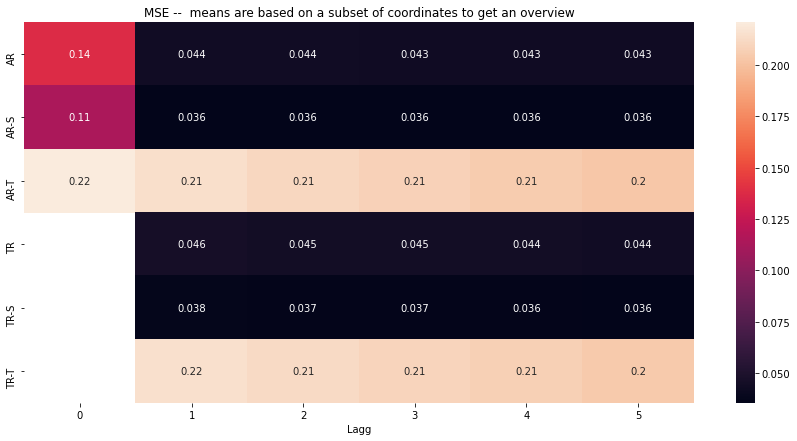

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax = sns.heatmap(merged, 
                 annot = True, # xticklabels='auto', 
                 yticklabels=ar_names+tr_names, ax = ax)
ax.set_xlabel('Lagg')
ax.set_title('MSE --  means are based on a subset of coordinates to get an overview')

# Comments TODOs
1. Look more into weights - which predictors are important. 
2. Looks like adding more than one lag does add any significat information. 
3. In isolation sigmoid transformation perform best, followed by none and last is scaling the data. 
4. There is a small difference between ar and tr models, where ar does it best. 


Tenker og kjøre følgende andre kombinasjoner 
* B in isolation 
* BS, BT
* BST

# Gridded data -- Didn't to to much work on this is difficult to acess performance on a gridded level. For further I find it best to focus on a calibrated level. 

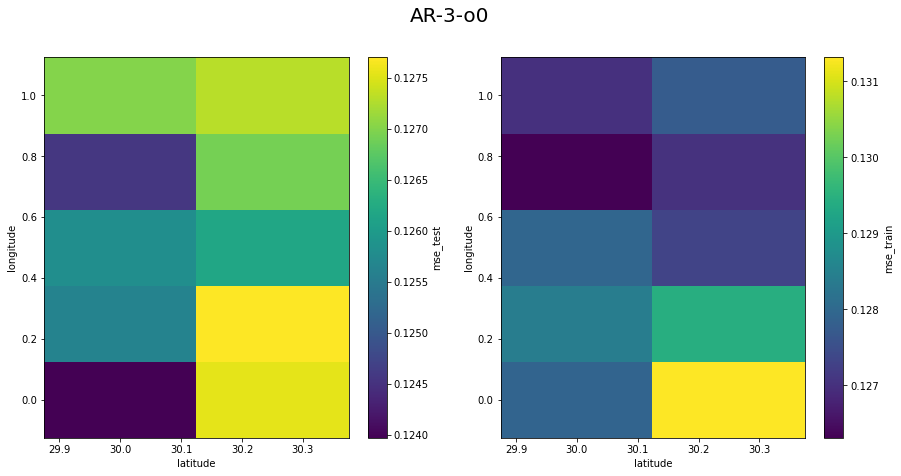

In [33]:
key = 'AR-3-o0'
relevant_files = glob.glob(path+f'/performance*{key}*')
data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
data['mse_test'].plot(ax = axes[0])
data['mse_train'].plot(ax = axes[1])
fig.suptitle(key, fontsize = 20);

In [48]:
def plot_mse(key = 'AR-3-o0'):
    """ Quick plot function .. """
    relevant_files = glob.glob(path+f'/performance*{key}*')
    data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
    data['mse_test'].plot(ax = axes[0])
    data['mse_train'].plot(ax = axes[1])
    fig.suptitle(key, fontsize = 20);
    plt.show()
    return 

In [ ]:
for model in unique_models:
    plot_mse(key = model)

# Performance

In [10]:
path = '/home/hanna/lagrings/results/ar/'
example = glob.glob(path+'/wei*-5-o2*')

In [11]:
subset = example[0:2]
subset

['/home/hanna/lagrings/results/ar/weights_AR-5-o2_-12.75_30.0.nc',
 '/home/hanna/lagrings/results/ar/weights_AR-5-o2_-14.75_30.0.nc']

In [6]:
weights = xr.open_dataset('/home/hanna/lagrings/results/ar/weights_AR-5-o2_-12.75_30.0.nc') 

In [13]:
weights = xr.open_mfdataset(subset, combine = 'by_coords') 

array(['q', 't2m', 'r', 'sp', 'O1', 'O2'], dtype=object)

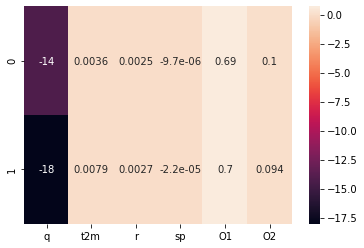

In [24]:
sns.heatmap(weights.coeffs.values, annot = True, xticklabels = weights.weights.values)

# Sjekk om vektene alltid har samme fortegn..? Det vil våære ufysisk eller bare lokale forskjeller
## Har de samme tegn for ulike tranformasjoener av target og predictors. 